In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import seaborn as sns
from datetime import datetime, timedelta
from scipy.stats import pearsonr
from scipy.stats import kendalltau
from scipy.stats import spearmanr
import os

In [2]:
df_history = pd.read_csv("C:/Users/felix.oechslein/Desktop/Analysen Thalia, Mai/Rohdaten/"+
                                    "history_ohne_vorname.csv")

#### 1 Historien-Daten bereinigen
##### ausschließlich Öffungen als Interaktionen betrachtet

In [3]:
df_h_bereinigt = df_history[["iid", "attrtype", "akey", "creation", "text"]]
df_h_bereinigt = df_h_bereinigt.query('attrtype == "NO" or attrtype == "HY"')
df_h_bereinigt.head()

,iid,attrtype,akey,creation,text
0,100253777,NO,240805772,20220330211124,|msg=Einladung_Fraternitee_Lounge|userAgent=Ap...
1,100256545,NO,240805772,20220330204021,|msg=Einladung_Fraternitee_Lounge|userAgent=Mo...
2,100083508,NO,232751147,20220330204142,|msg=NL_April_1_2022|userAgent=Thunderbird 91....
3,100256545,NO,240805772,20220330204152,|msg=Einladung_Fraternitee_Lounge|userAgent=Mo...
4,100922912,NO,227354388,20220330204217,|msg=NL_März_2_2022|userAgent=Apple Mail (OS X...


##### creation als date im format datetime darstellen

In [4]:
df_h_bereinigt["creation"] = pd.to_datetime(df_h_bereinigt['creation'], format='%Y%m%d%H%M%S')
df_h_bereinigt.rename(columns = {"creation" : "date"}, inplace = True)
df_h_bereinigt.head()

,iid,attrtype,akey,date,text
0,100253777,NO,240805772,2022-03-30 21:11:24,|msg=Einladung_Fraternitee_Lounge|userAgent=Ap...
1,100256545,NO,240805772,2022-03-30 20:40:21,|msg=Einladung_Fraternitee_Lounge|userAgent=Mo...
2,100083508,NO,232751147,2022-03-30 20:41:42,|msg=NL_April_1_2022|userAgent=Thunderbird 91....
3,100256545,NO,240805772,2022-03-30 20:41:52,|msg=Einladung_Fraternitee_Lounge|userAgent=Mo...
4,100922912,NO,227354388,2022-03-30 20:42:17,|msg=NL_März_2_2022|userAgent=Apple Mail (OS X...


##### ausschließlich unique Öffnungen betrachtet

In [5]:
df_h_bereinigt = df_h_bereinigt.loc[df_h_bereinigt.groupby(["iid", "attrtype", "akey"])["date"].idxmin()]

In [6]:
df_h_bereinigt.head(50)

,iid,attrtype,akey,date,text
3068185,100001735,HY,100001679,2020-04-02 14:00:03,"|msg=DOI Aktivierung ""Newsletter""|subject=Klic..."
2994157,100001735,HY,107601295,2020-05-07 11:56:17,|msg=NL_Mai_1|subject=St%C3%BCck+der+Stunde%3A...
2995201,100001735,HY,108268529,2020-05-19 11:11:26,|msg=NL_Mai_2|subject=Online+Premiere+%22Kabal...
3033619,100001735,HY,108552325,2020-06-02 18:00:26,|msg=NL_Corona_1|subject=Sondernewsletter%3A+J...
3086869,100001735,HY,108668409,2020-06-17 13:22:02,|msg=NL_Programm_Spielzeit20_21|subject=Das+Pr...
616821,100001735,HY,109328444,2020-06-25 16:52:00,|msg=NL_Abschluss Saison 19_20|subject=Zum+End...
3504749,100001735,HY,109453166,2020-08-14 17:25:15,|msg=NL_August_1_2020|subject=Wir+sind+zur%C3%...
2856915,100001735,HY,109809231,2020-08-25 11:52:35,|msg=NL_August_2_2020|subject=Theater%2C+Theat...
3367702,100001735,HY,109901423,2020-09-07 11:11:34,|msg=NL_September_1_2020|subject=Paradiesische...
3332828,100001735,HY,110010287,2020-09-21 11:07:33,|msg=NL_September_2_2020|subject=Raus+aus+dem+...


#### Einträge für jede iid im Zeitverlauf sortieren

In [7]:
df_h_bereinigt = df_h_bereinigt.sort_values(by=["iid", "date"])

In [8]:
df_h_bereinigt.tail(50)

,iid,attrtype,akey,date,text
2016100,289812790,HY,288661886,2022-12-12 11:32:16,|msg=NL_Dezember_2_2022|subject=Flederm%C3%A4u...
2016099,289812790,NO,288661886,2022-12-12 11:58:17,|msg=NL_Dezember_2_2022|hidden=true|fullUserAg...
1999958,289823976,HY,288661886,2022-12-12 11:28:56,|msg=NL_Dezember_2_2022|subject=Flederm%C3%A4u...
2009804,289823976,NO,288661886,2022-12-12 11:29:10,|msg=NL_Dezember_2_2022|hidden=true|fullUserAg...
1983855,289836101,HY,288677847,2022-12-11 18:01:14,|msg=Gauß SM: Eurotrash 12.12.2022|subject=Ihr...
1984046,289836101,NO,288677847,2022-12-11 19:12:11,|msg=Gauß SM: Eurotrash 12.12.2022|hidden=true...
1985098,289850288,HY,288661886,2022-12-12 11:02:37,|msg=NL_Dezember_2_2022|subject=Flederm%C3%A4u...
1996253,289852562,HY,288661886,2022-12-12 11:21:06,|msg=NL_Dezember_2_2022|subject=Flederm%C3%A4u...
2007366,289852562,NO,288661886,2022-12-12 11:25:16,|msg=NL_Dezember_2_2022|hidden=true|fullUserAg...
1990142,289854752,HY,288661886,2022-12-12 11:04:44,|msg=NL_Dezember_2_2022|subject=Flederm%C3%A4u...


##### Textfeld bearbeiten, um DOI Mails herauszufiltern

In [9]:
df_DOI = df_h_bereinigt[df_h_bereinigt['text'].str.contains('Double-Opt-In|DOI')]

In [10]:
pd.set_option('display.max_colwidth', None)

In [11]:
df_DOI.head()

,iid,attrtype,akey,date,text
3068185,100001735,HY,100001679,2020-04-02 14:00:03,"|msg=DOI Aktivierung ""Newsletter""|subject=Klicken+Sie%2C+um+Ihren+Newsletter+zu+aktivieren|event.name=registeredByHomepage|language=de|campaign.id=100001679|event.fireDate=20200402135800|email.messageId=<100000490.100001679.6015629054690437176@hamburgkultur.de>|mimeType=campaign|bccEmail=|senderName=THALIA+Theater|generatedNlids=2,64|nlType=100000998|name=DOI Aktivierung ""Newsletter""|linkType=campaign.newsletterDelivered|receiverEmail=christian.wittlinger@wilken.de|"
2032345,100001735,NO,100001679,2020-04-02 14:00:19,"|msg=DOI Aktivierung ""Newsletter""|userAgent=IE 7.0 (Windows / Personal computer)|hidden=true|ip=83.242.58.185|userLanguage=de|"
3625921,100001769,HY,100001679,2020-04-03 00:43:03,"|msg=DOI Aktivierung ""Newsletter""|subject=Klicken+Sie%2C+um+Ihren+Newsletter+zu+aktivieren|event.name=registeredByHomepage|language=de|campaign.id=100001679|event.fireDate=20200403004000|email.messageId=<100000490.100001679.3484017467957551707@hamburgkultur.de>|mimeType=campaign|bccEmail=|senderName=THALIA+Theater|generatedNlids=2,64|nlType=100000998|name=DOI Aktivierung ""Newsletter""|linkType=campaign.newsletterDelivered|receiverEmail=bjoernwolf@fonshickmann.com|"
2032323,100001769,NO,100001679,2020-04-03 00:43:24,"|msg=DOI Aktivierung ""Newsletter""|userAgent=Apple Mail (OS X / Personal computer)|hidden=true|ip=89.14.121.127|userLanguage=de|"
2032341,100001784,HY,100001679,2020-04-03 11:38:03,"|msg=DOI Aktivierung ""Newsletter""|subject=Klicken+Sie%2C+um+Ihren+Newsletter+zu+aktivieren|event.name=registeredByHomepage|language=de|campaign.id=100001679|event.fireDate=20200403113600|email.messageId=<100000490.100001679.6644956559469046934@hamburgkultur.de>|mimeType=campaign|bccEmail=|senderName=THALIA+Theater|generatedNlids=2,64|nlType=100000998|name=DOI Aktivierung ""Newsletter""|linkType=campaign.newsletterDelivered|receiverEmail=kulturtipps.ndrinfo@ndr.de|"


In [12]:
index_to_drop = df_h_bereinigt[df_h_bereinigt.index.isin(df_DOI.index)].index
df_h_bereinigt.drop(index=index_to_drop, inplace=True)

##### Filtern nach NL/Newsletter

In [13]:
df_kein_NL = df_h_bereinigt[~df_h_bereinigt['text'].str.contains('NL|Newsletter', na=False)]

In [14]:
df_kein_NL.head(50)

,iid,attrtype,akey,date,text
4212364,100001735,HY,137282999,2021-09-08 11:16:30,"|msg=StandAlone_DieZEIT_1_2021|subject=Was+wir+lesen|language=de|campaign.id=137282999|email.messageId=<100000490.137282999.5687141085132277941@hamburgkultur.de>|mimeType=campaign|bccEmail=|senderName=Thalia+Theater|generatedNlids=1,10,12,13,14|nlType=100000998|name=StandAlone_DieZEIT_1_2021|linkType=campaign.newsletterDelivered|receiverEmail=christian.wittlinger@wilken.de|"
2562114,100001735,NO,137282999,2021-09-10 09:48:44,|msg=StandAlone_DieZEIT_1_2021|userAgent=IE 10.0 (Windows / Personal computer)|hidden=true|ip=185.49.138.4|userLanguage=de|
756193,100001735,HY,255661375,2022-05-25 11:36:45,"|msg=StandAlone_DIE ZEIT_2_2022|subject=Auszeit+gef%C3%A4llig%3F+Hier+empfiehlt+DIE+ZEIT+Lieblingsorte+f%C3%BCr+nah+und+fern|language=de|campaign.id=255661375|email.messageId=<100000490.255661375.8730636205307733766@hamburgkultur.de>|mimeType=campaign|bccEmail=|senderName=Thalia+Theater|generatedNlids=-1,-2,10,11,12,13,14,15,16,17,18,19,20,21|nlType=100000998|name=StandAlone_DIE ZEIT_2_2022|linkType=campaign.newsletterDelivered|receiverEmail=christian.wittlinger@wilken.de|"
1714459,100001735,HY,282156425,2022-11-09 14:14:34,"|msg=StandAlone_DIe Zeit_3_2022|subject=Auszeit+gef%C3%A4llig%3F+Hier+empfiehlt+DIE+ZEIT+Lieblingsorte+f%C3%BCr+nah+und+fern|language=de|campaign.id=282156425|email.messageId=<100000490.282156425.3938148377423972871@hamburgkultur.de>|mimeType=campaign|bccEmail=|senderName=Thalia+Theater|generatedNlids=-1,-2,10,11,12,13,14,15,16,17,18,19,20,21,22|nlType=100000998|name=StandAlone_DIe Zeit_3_2022|linkType=campaign.newsletterDelivered|receiverEmail=christian.wittlinger@wilken.de|"
1076803,100001735,NO,282156425,2022-11-09 16:21:48,|msg=StandAlone_DIe Zeit_3_2022|hidden=true|fullUserAgent=Mozilla/4.0 (compatible; ms-office; MSOffice 16)|ip=10.40.208.112|userAgent=Outlook 16 (unknown / Personal computer)|userLanguage=de|
4208616,100001769,HY,137282999,2021-09-08 11:02:59,"|msg=StandAlone_DieZEIT_1_2021|subject=Was+wir+lesen|language=de|campaign.id=137282999|email.messageId=<100000490.137282999.2806488549859462396@hamburgkultur.de>|mimeType=campaign|bccEmail=|senderName=Thalia+Theater|generatedNlids=1,10,12,13,14|nlType=100000998|name=StandAlone_DieZEIT_1_2021|linkType=campaign.newsletterDelivered|receiverEmail=bjoernwolf@fonshickmann.com|"
4208136,100001769,NO,137282999,2021-09-08 11:08:01,|msg=StandAlone_DieZEIT_1_2021|userAgent=Apple Mail (OS X / Personal computer)|hidden=true|ip=80.153.217.162|userLanguage=de|
757055,100001769,HY,255661375,2022-05-25 11:32:11,"|msg=StandAlone_DIE ZEIT_2_2022|subject=Auszeit+gef%C3%A4llig%3F+Hier+empfiehlt+DIE+ZEIT+Lieblingsorte+f%C3%BCr+nah+und+fern|language=de|campaign.id=255661375|email.messageId=<100000490.255661375.4970542387518462071@hamburgkultur.de>|mimeType=campaign|bccEmail=|senderName=Thalia+Theater|generatedNlids=-1,-2,10,11,12,13,14,15,16,17,18,19,20,21|nlType=100000998|name=StandAlone_DIE ZEIT_2_2022|linkType=campaign.newsletterDelivered|receiverEmail=bjoernwolf@fonshickmann.com|"
759004,100001769,NO,255661375,2022-05-25 11:34:21,|msg=StandAlone_DIE ZEIT_2_2022|userAgent=Apple Mail (OS X / Personal computer)|hidden=true|ip=93.195.58.218|userLanguage=de|
1713239,100001769,HY,282156425,2022-11-09 14:11:16,"|msg=StandAlone_DIe Zeit_3_2022|subject=Auszeit+gef%C3%A4llig%3F+Hier+empfiehlt+DIE+ZEIT+Lieblingsorte+f%C3%BCr+nah+und+fern|language=de|campaign.id=282156425|email.messageId=<100000490.282156425.7924877864789600341@hamburgkultur.de>|mimeType=campaign|bccEmail=|senderName=Thalia+Theater|generatedNlids=-1,-2,10,11,12,13,14,15,16,17,18,19,20,21,22|nlType=100000998|name=StandAlone_DIe Zeit_3_2022|linkType=campaign.newsletterDelivered|receiverEmail=bjoernwolf@fonshickmann.com|"


In [15]:
index_to_drop = df_h_bereinigt[df_h_bereinigt.index.isin(df_kein_NL.index)].index
df_h_bereinigt.drop(index=index_to_drop, inplace=True)

##### Histogramm zu den versandten Mails seit April 2022

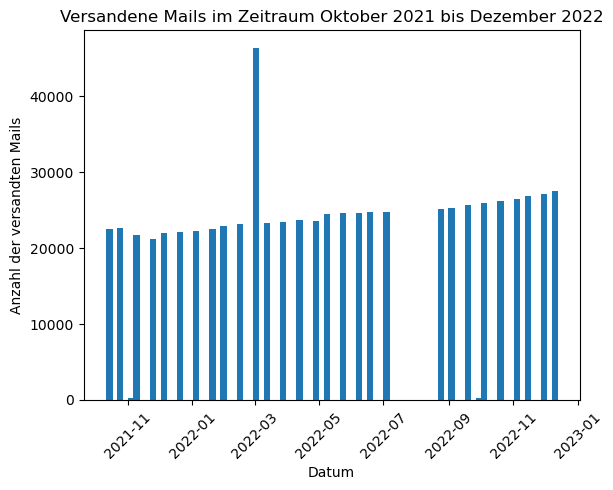

In [56]:
# Filtern des DataFrames nach dem gewünschten Zeitraum und dem Attribut "HY"
filtered_df = df_h_bereinigt[(df_h_bereinigt['date'] >= '2021-10-01') & (df_h_bereinigt['date'] <= '2022-12-31') & (df_h_bereinigt['attrtype'] == 'HY')]

# Erstellung des Histogramms
plt.hist(filtered_df['date'], bins="auto", width=6)  # Anpassung der Bins je nach gewünschter Darstellung
plt.xlabel('Datum')
plt.ylabel('Anzahl der versandten Mails')
plt.title('Versandene Mails im Zeitraum Oktober 2021 bis Dezember 2022')
plt.xticks(rotation=45)  # Rotiere die x-Achsenbeschriftung für bessere Lesbarkeit

# Speichere den Plot als Datei
plt.savefig("C:/Users/felix.oechslein/Desktop/Analysen Thalia, Mai/Grafiken/" +
            'histogramm_versandte_Mails_Okt21_Dez22.png', dpi = 400)
plt.show()

In [51]:
# Filtern des DataFrames nach dem gewünschten Zeitraum und dem Attribut "HY"
filtered_df = df_h_bereinigt[(df_h_bereinigt['date'] >= '2021-10-01') & (df_h_bereinigt['date'] <= '2022-12-31') & (df_h_bereinigt['attrtype'] == 'HY')]

# Gruppieren nach Akey und Zählen der Anzahl der versendeten Mails pro Akey
akey_mail_counts = filtered_df.groupby('akey')['attrtype'].count()

# Filtern nach Akeys mit mehr als 5000 versendeten Mails
filtered_akeys = akey_mail_counts[akey_mail_counts > 5000]

# Anzahl der eindeutigen Akeys ermitteln
unique_akeys_count = len(filtered_akeys)

print("Anzahl der eindeutigen Akeys im Zeitraum Oktober 2021 bis Dezember 2022 mit mehr als 5000 versendeten Mails:", unique_akeys_count)


Anzahl der eindeutigen Akeys im Zeitraum Oktober 2021 bis Dezember 2022 mit mehr als 5000 versendeten Mails: 30


#### Analyse der Daten für März 2022

In [58]:
# Filtern des DataFrames nach Kampagnen im März 2022 mit mehr als 5000 versendeten Mails
filtered_df = df_h_bereinigt[(df_h_bereinigt['attrtype'] == 'HY') & (df_h_bereinigt['date'].dt.month == 3) & (df_h_bereinigt['date'].dt.year == 2022)]
filtered_df = filtered_df.groupby('akey').filter(lambda x: len(x) > 5000)

# Extrahieren der eindeutigen Werte der "akey"-Spalte
akey_values = filtered_df['akey'].unique()

# Ausgabe der Akeys
print(akey_values)


[226795591 227354388 232751147]


In [60]:
df_h_bereinigt[df_h_bereinigt["akey"] == 227354388].head()

,iid,attrtype,akey,date,text
249749,100001735,HY,227354388,2022-03-14 12:47:15,"|msg=NL_März_2_2022|subject=Das+Spektakel+%22Hymnen+an+die+Nacht%22+am+26.+M%C3%A4rz|language=de|campaign.id=227354388|email.messageId=<100000490.227354388.4781638355161713837@hamburgkultur.de>|mimeType=campaign|bccEmail=|senderName=Thalia+Theater|generatedNlids=-1,-2,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65|nlType=100000998|name=NL_März_2_2022|linkType=campaign.newsletterDelivered|receiverEmail=christian.wittlinger@wilken.de|"
241437,100001769,HY,227354388,2022-03-14 12:06:58,"|msg=NL_März_2_2022|subject=Das+Spektakel+%22Hymnen+an+die+Nacht%22+am+26.+M%C3%A4rz|language=de|campaign.id=227354388|email.messageId=<100000490.227354388.6297031478943422851@hamburgkultur.de>|mimeType=campaign|bccEmail=|senderName=Thalia+Theater|generatedNlids=-1,-2,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65|nlType=100000998|name=NL_März_2_2022|linkType=campaign.newsletterDelivered|receiverEmail=bjoernwolf@fonshickmann.com|"
244309,100001769,NO,227354388,2022-03-14 12:22:06,|msg=NL_März_2_2022|userAgent=Apple Mail (OS X / Personal computer)|hidden=true|ip=80.153.217.162|userLanguage=de|
236323,100001784,HY,227354388,2022-03-14 11:40:09,"|msg=NL_März_2_2022|subject=Das+Spektakel+%22Hymnen+an+die+Nacht%22+am+26.+M%C3%A4rz|language=de|campaign.id=227354388|email.messageId=<100000490.227354388.8288636596763527885@hamburgkultur.de>|mimeType=campaign|bccEmail=|senderName=Thalia+Theater|generatedNlids=-1,-2,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65|nlType=100000998|name=NL_März_2_2022|linkType=campaign.newsletterDelivered|receiverEmail=kulturtipps.ndrinfo@ndr.de|"
231622,100001938,HY,227354388,2022-03-14 11:12:14,"|msg=NL_März_2_2022|subject=Das+Spektakel+%22Hymnen+an+die+Nacht%22+am+26.+M%C3%A4rz|language=de|campaign.id=227354388|email.messageId=<100000490.227354388.6085175386160638154@hamburgkultur.de>|mimeType=campaign|bccEmail=|senderName=Thalia+Theater|generatedNlids=-1,-2,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65|nlType=100000998|name=NL_März_2_2022|linkType=campaign.newsletterDelivered|receiverEmail=astrid.urban@bonprix.net|"


##### Monate als t = 1, .... abspeichern

In [19]:
# Berechnung der neuen Spalte "month_count"
df_h_bereinigt['month_count'] = (df_h_bereinigt['date'].dt.year - 2020) * 12 + df_h_bereinigt['date'].dt.month - 5

(array([195336., 152005., 146792., 172130., 116709., 177817., 224711.,
        244053., 144770., 309381.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <BarContainer object of 10 artists>)

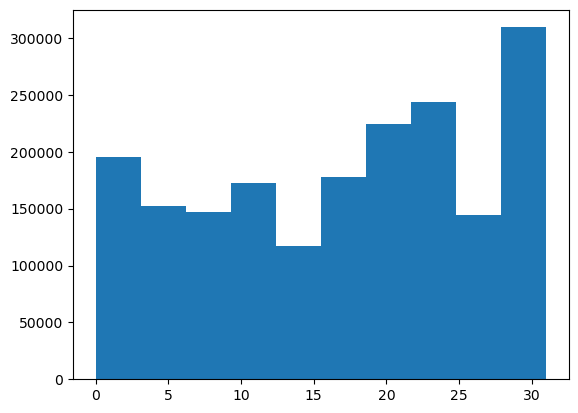

In [20]:
plt.hist( df_h_bereinigt["month_count"])

In [21]:
df_h_bereinigt['date'].min()

Timestamp('2020-05-07 11:43:13')

#### 2. verarbeiteteDaten als Elphi_history_ersteBereinigung.csv in dem Ordner verarbeitete_Daten abspeichern

In [22]:
path = r'C:/Users/felix.oechslein/Desktop/Analysen Thalia, Mai/verarbeitete_daten'
filename = 'Thalia_history_ersteBereinigung.csv'

df_h_bereinigt.to_csv(os.path.join(path, filename), index=False)

In [1]:
df_h_bereinigt["iid"].unique()

NameError: name 'df_h_bereinigt' is not defined